# Algoritmo: Ford-Fulkerson
## Complexity: O(E * f)
Description:
    E: number of edges
    f: max flow
    This algorithm finds the max flow in a graph.
    It uses a BFS to find a path from the source to the sink.
    Then it finds the minimum capacity of the path and updates the residual graph.
    It repeats until there are no more paths from the source to the sink.
    The max flow is the sum of the minimum capacities of the paths.
    The complexity is O(E * f) because the BFS is O(E) and it is repeated f times.
    The BFS is repeated f times because the minimum capacity of the path is at least 1.
    The complexity can be O(V * E^2) if the graph is dense.
    The complexity can be O(E * sqrt(V)) if the graph is sparse.  


Grafo iniziale:
0 -> 8, 4, 6, 1
1 -> 0, 8
2 -> 6, 9, 3
3 -> 6, 2
4 -> 0, 6
6 -> 0, 3, 4, 2
7 -> 9
8 -> 0, 1, 9
9 -> 2, 8, 7
Clusters: [[0, 1, 2, 3, 4, 6, 7, 9], [8]]
Ogni nodo deve essere collegato in qualche modo ad un altro nodo del cluster.


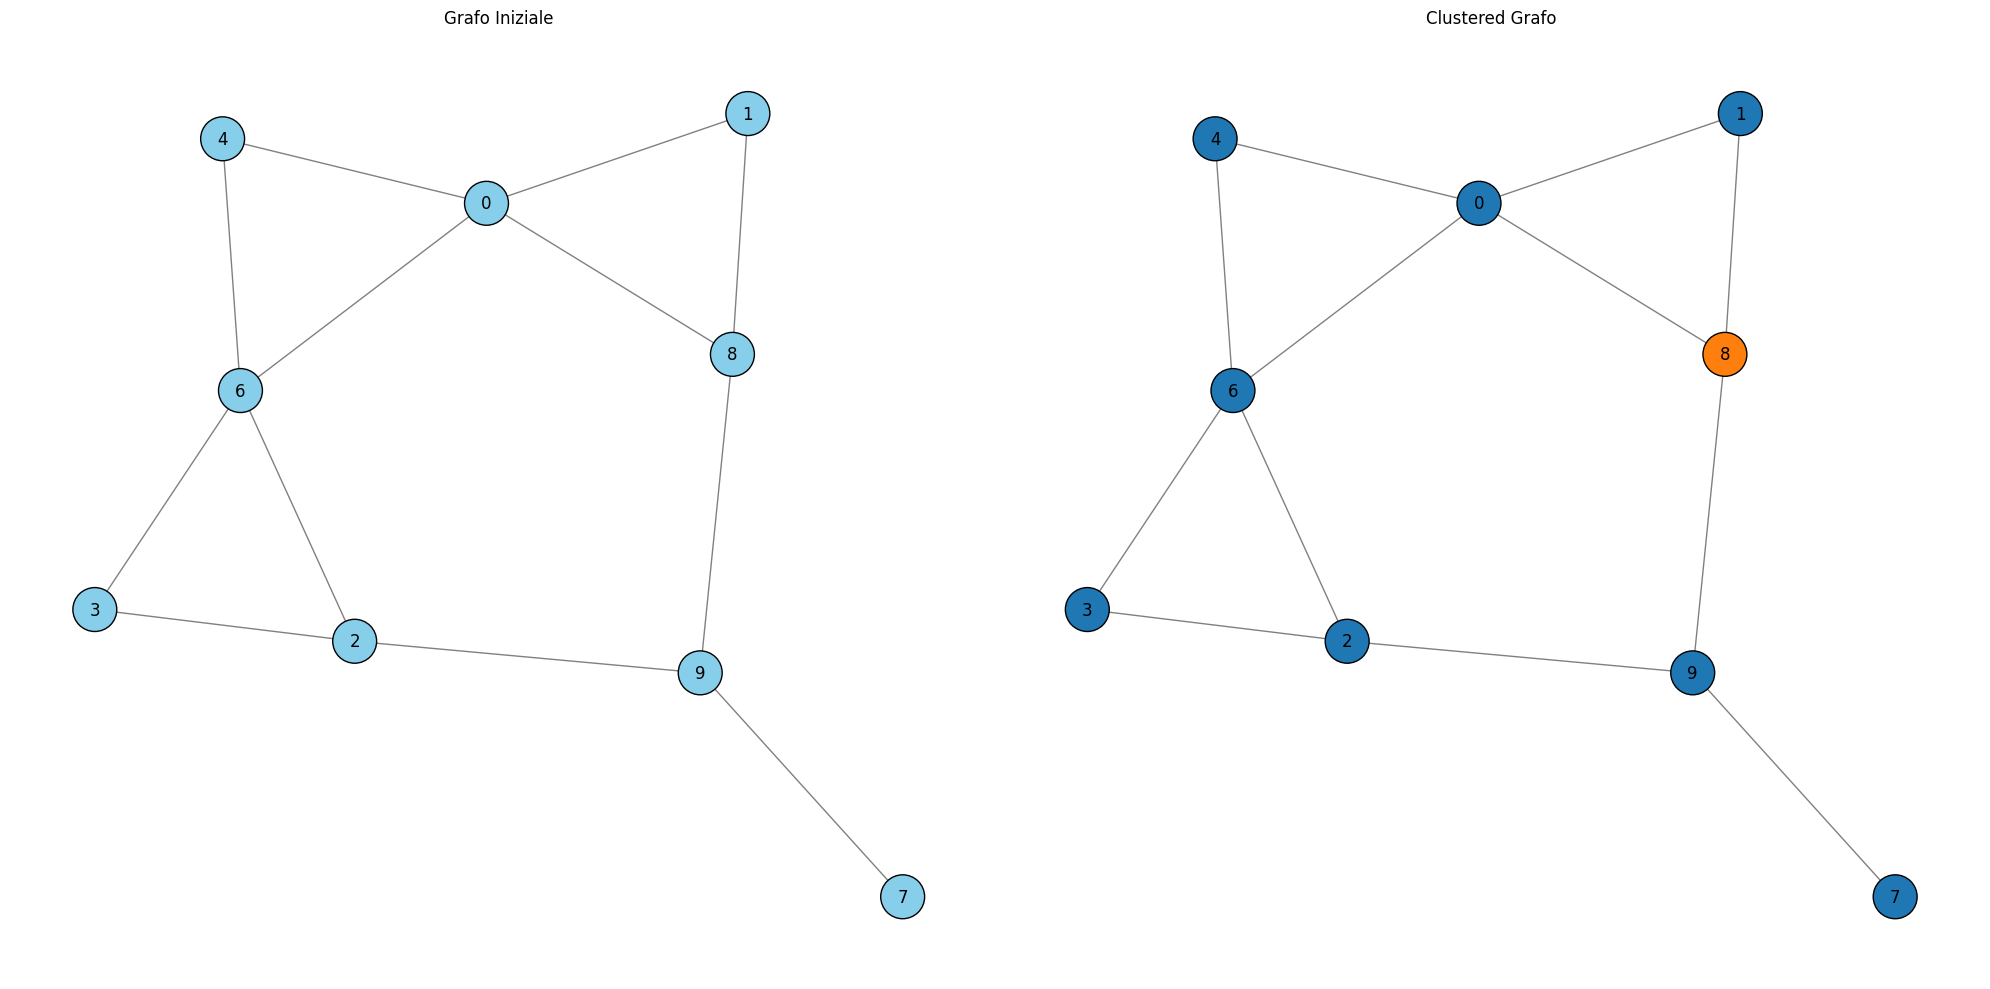

Tempo di esecuzione dell'algoritmo di flusso massimo: 0.0004673004150390625 secondi.


In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import time, itertools


def plot_graph(graph, title, subplot_position=None, filename=None, colors=None):
    plt.subplot(subplot_position) if subplot_position else plt.figure()
    pos = nx.spring_layout(graph, seed=42)
    labels = {node: str(node) for node in graph.nodes()}
    node_colors = {node: 'skyblue' for node in graph.nodes()}

    if colors:
        color_cycle = itertools.cycle(plt.cm.tab10.colors)
        for i, cluster in enumerate(colors):
            color = next(color_cycle)
            for node in cluster:
                node_colors[int(node)] = color

    nx.set_node_attributes(graph, node_colors, 'color')

    nx.draw(graph, pos, with_labels=True, labels=labels, node_size=1000, node_color=list(node_colors.values()), 
            font_size=12, font_color='black', edge_color='gray', edgecolors='black', linewidths=1)

    plt.title(title)
    if filename and not subplot_position:
        plt.savefig(filename)
    if not subplot_position:
        plt.show()

class Graph:
    def __init__(self):
        self.grafo = {}

    def aggiungi_vertice(self, vertice):
        if vertice not in self.grafo:
            self.grafo[vertice] = []

    def aggiungi_arco(self, u, v):
        if u in self.grafo and v in self.grafo:
            self.grafo[u].append(v)
            self.grafo[v].append(u)

    def rimuovi_vertice(self, vertice):
        if vertice in self.grafo:
            self.grafo.pop(vertice, None)
            for nodo, adiacenti in self.grafo.items():
                if vertice in adiacenti:
                    adiacenti.remove(vertice)

    def stampa_grafo(self):
        for vertice in self.grafo:
            adiacenti = ", ".join(str(v) for v in self.grafo[vertice])
            print(f"{vertice} -> {adiacenti}")
            
def converti_grafo_personalizzato_in_networkx(grafo_personalizzato):
    G = nx.Graph()
    for vertice, adiacenti in grafo_personalizzato.grafo.items():
        G.add_node(vertice)
        for adiacente in adiacenti:
            G.add_edge(vertice, adiacente, capacity=1)  # Assegna una capacità di 1
    return G


def find_st_cut(graph):
    """Trova il taglio s-t con il flusso massimo nel grafo."""
    nodes = list(graph.nodes())
    if len(nodes) < 2:
        return nodes, []
    s, t = nodes[:2]
    cut_value, partition = nx.minimum_cut(graph, s, t)
    reachable, non_reachable = partition
    return reachable, non_reachable


def divide_into_clusters(graph, k):
    """
    Suddividi il grafo in k cluster utilizzando l'algoritmo di flusso massimo.
    """
    clusters = []
    while len(clusters) < k - 1 and graph.number_of_nodes() > 1:
        # Trova un taglio s-t
        reachable, non_reachable = find_st_cut(graph)
        if not reachable:
            break
        clusters.append(list(reachable))

        # Rimuovi nodi raggiungibili dal grafo
        for node in reachable:
            graph.remove_node(node)
    
    # Aggiungi i nodi rimanenti come ultimo cluster
    if graph.nodes():
        clusters.append(list(graph.nodes()))
    
    return clusters


def check_solution(graph, clusters):
    total_nodes = sum(len(cluster) for cluster in clusters)
    if total_nodes != graph.number_of_nodes():
        print("Ogni nodo deve essere in un solo cluster.")
        return False

    for cluster in clusters:
        for node in cluster:
            node_neighbors = set(graph.neighbors(node))
            cluster_set = set(cluster)
            if not node_neighbors & cluster_set:
                print("Ogni nodo deve essere collegato in qualche modo ad un altro nodo del cluster.")
                return False

    multicut_size = calculate_multicut_size(graph, clusters)
    print("Dimensione del multi-cut:", multicut_size)

    print("La soluzione è ammissibile.")
    return True

def calculate_multicut_size(graph, clusters):
    multicut_size = 0
    for cluster in clusters:
        for node in cluster:
            for neighbor in graph.neighbors(node):
                if neighbor not in cluster:
                    multicut_size += 1
    return multicut_size // 2

if __name__ == "__main__":
    grafo = Graph()
    for i in range(10):
        grafo.aggiungi_vertice(i)

    grafo.aggiungi_arco(0, 8)
    grafo.aggiungi_arco(0, 4)
    grafo.aggiungi_arco(0, 6)
    grafo.aggiungi_arco(1, 0)
    grafo.aggiungi_arco(1, 8)
    grafo.aggiungi_arco(6, 3)
    grafo.aggiungi_arco(6, 4)
    grafo.aggiungi_arco(6, 2)
    grafo.aggiungi_arco(2, 9)
    grafo.aggiungi_arco(3, 2)
    grafo.aggiungi_arco(8, 9)
    grafo.aggiungi_arco(9, 7)
    
    grafo.rimuovi_vertice(5)
    print("Grafo iniziale:")
    grafo.stampa_grafo()

    plt.figure(figsize=(20, 10))

    G_initial = converti_grafo_personalizzato_in_networkx(grafo)
    plot_graph(G_initial, "Grafo Iniziale", 121)

    k = 4
    start_time = time.time()
    clusters = divide_into_clusters(G_initial.copy(), k)
    end_time = time.time()
    elapsed_time = end_time - start_time

    print("Clusters:", clusters)
    check_solution(G_initial, clusters)

    plot_graph(G_initial, "Clustered Grafo", 122, colors=clusters)

    plt.tight_layout()
    plt.savefig("grafo.png")
    plt.show()

    print(f"Tempo di esecuzione dell'algoritmo di flusso massimo: {elapsed_time} secondi.")
